# Homework 1 Intro To Machine learning Duncan Conly ID #010958878

# Importing Libraries

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# 

# Read the Data from the CSV file

In [2]:
data_path = 'Data/Boston.csv' # create path to the data
information = pd.read_csv(data_path) # read the data at the created path

print("Dataset Preview:")
print(information.head())


Dataset Preview:
   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


# Clean the Data

In [3]:
information = information.drop(columns=["Unnamed: 0"], errors='ignore')


print ("Dataset Preview::")
print(information.head())


print("\nData Info: ")
print(information.info())

Dataset Preview::
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       5

# Run EDA

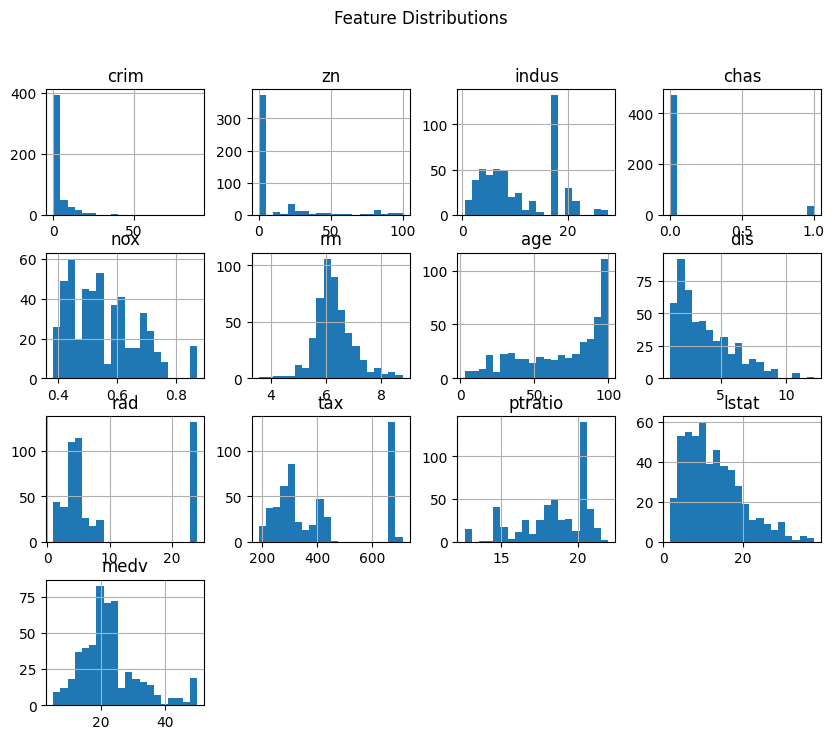

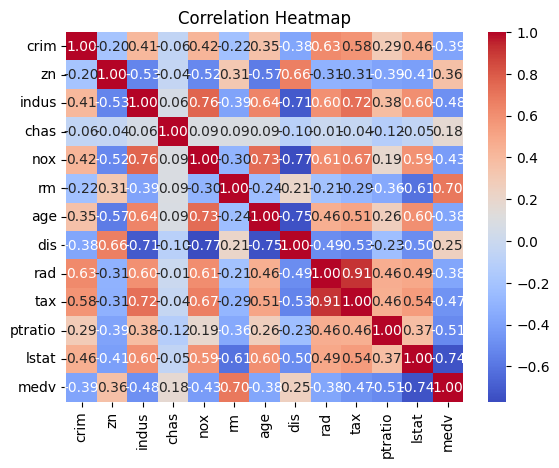

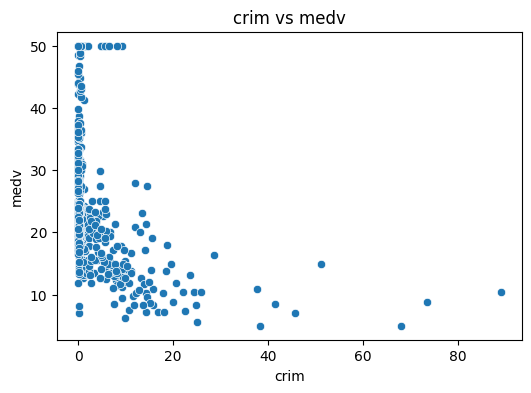

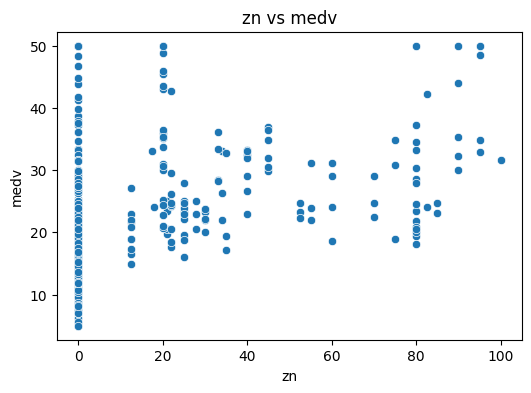

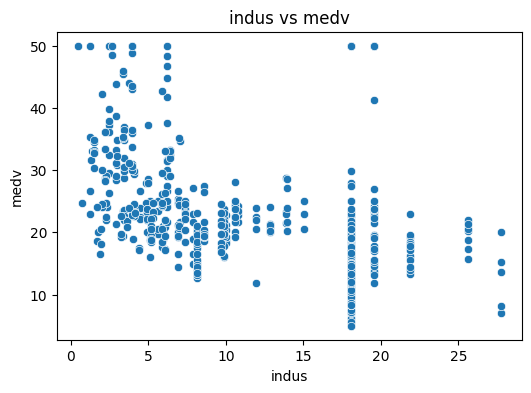

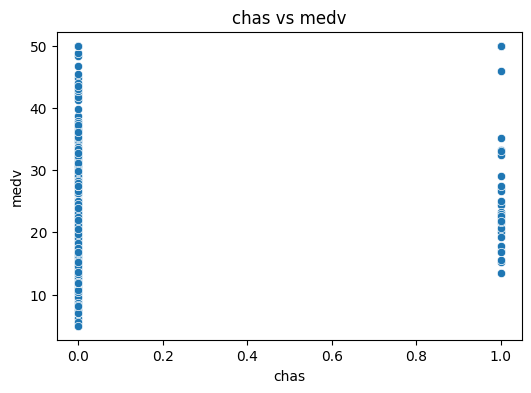

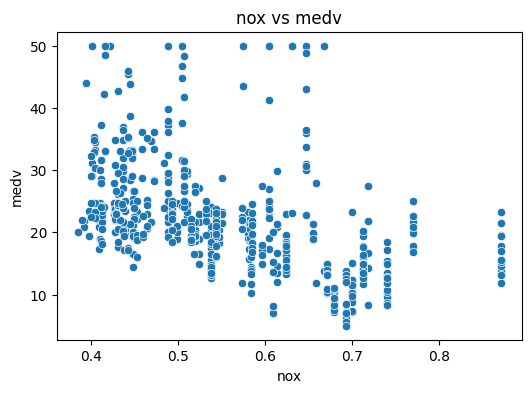

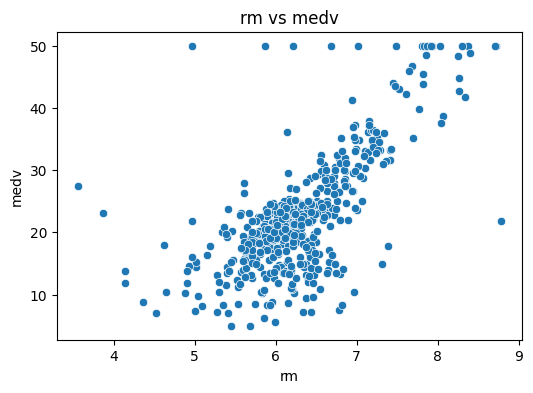

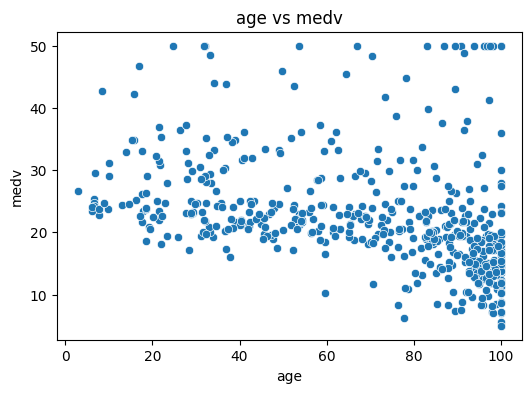

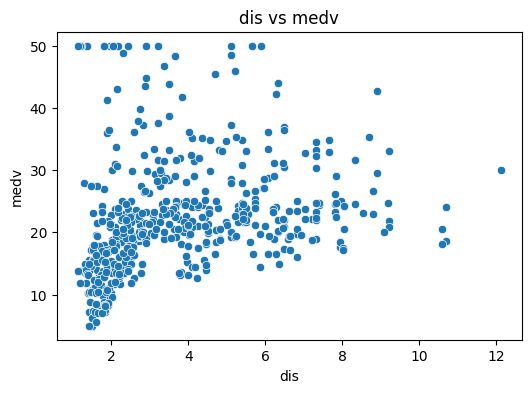

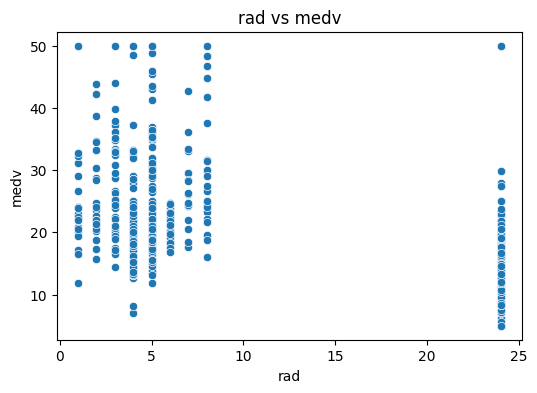

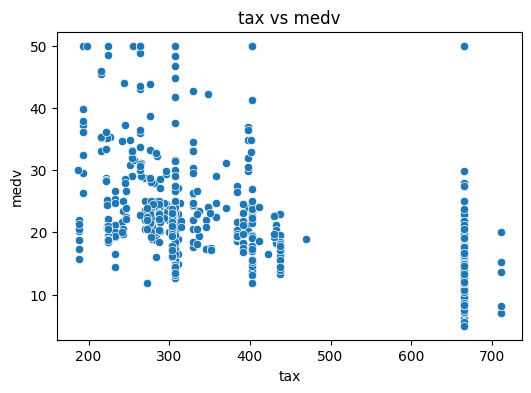

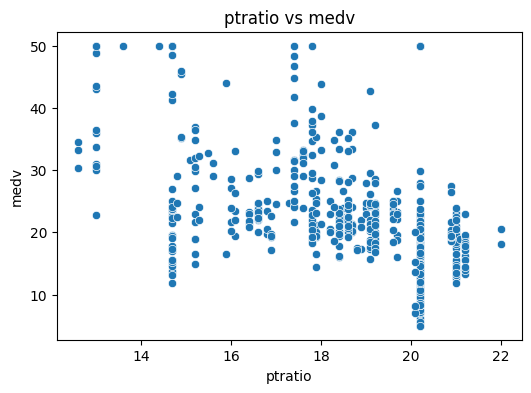

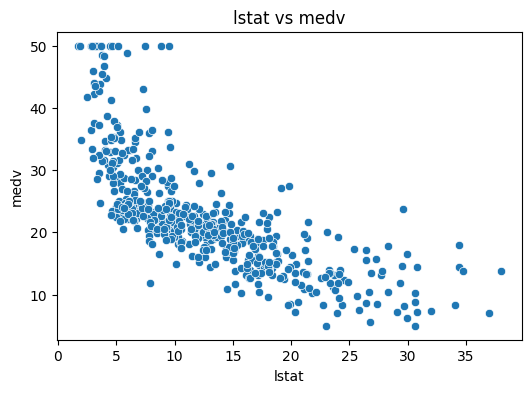

In [4]:

# Distribution of each of the features
information.hist(bins=20, figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap
correlation_matrix = information.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

target = 'medv'

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']

# crim - per capita crime rate by town
# zn - proportion of residential land zones for large lots
# indus - proportion of non-retial business acres per town
# chas - charles river dummy variable (1 if tract bounds river, 0 otherwise)
# nox - nitrogen oxide concentration
# rm - average number of rooms per dwelling
# age - proportion of owner occupied units built before 1940
# dis - weighted distance fo fire boston employment centers
# rad - index of accessibility to radial highways
# tax - property tax rate per $10,000
# ptratio - Pupil-teacher ration by town
# lstat - Percentage of lower status population

# medv - median value of owner occupied homes in $1000's

for feature in features :
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=information[feature], y=information[target])
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

# Separate Features and Target variables, Divide data into Train and Test set

In [5]:
X = information.drop(columns=["medv"])
y = information["medv"]


# Splitting up the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



# Linear Regression

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
intercept = model.intercept_

coefficients = model.coef_

print("intercept:" , intercept)
print("Coefficients:" , coefficients)

intercept: 36.97046906703024
Coefficients: [-1.27195928e-01  3.07954889e-02  2.52477064e-02  3.04947682e+00
 -1.81832461e+01  4.24009781e+00 -3.59439826e-03 -1.46550703e+00
  2.39990397e-01 -1.12752436e-02 -8.94844726e-01 -5.37770202e-01]


In [8]:
y_pred = model.predict(X_train)
print("Mean Squared Error:" , mean_squared_error(y_train, y_pred))
print("R-squared:", r2_score(y_train,y_pred))

Mean Squared Error: 22.60428647941742
R-squared: 0.739801993681731


In [9]:
y_pred = model.predict(X_test)
print("Mean Squared Error:" , mean_squared_error(y_test, y_pred))
print("R-squared:" , r2_score(y_test, y_pred))

Mean Squared Error: 22.777708563866224
R-squared: 0.6893967884614736


In [10]:
def predict_price(crime_rate, zn_zone, indus_acres, chas_dummy, nox_NO, rm_rooms, age_bf1940, dis_distance, rad_radial, tax_rate, ptratio_pupilteacher, lsat_lowerstatus) :
    prediction = model.predict([[crime_rate, zn_zone, indus_acres, chas_dummy, nox_NO, rm_rooms, age_bf1940, dis_distance, rad_radial, tax_rate, ptratio_pupilteacher, lsat_lowerstatus]])
    return prediction[0]

crime_rate = 0
zn_zone = 0
indus_acres = 0
chas_dummy = 0
nox_NO = 0
rm_rooms = 0
age_bf1940 = 0
dis_distance = 0
rad_radial = 0
tax_rate = 0
ptratio_pupilteacher = 0
lsat_lowerstatus = 0

predicted_price = (crime_rate, zn_zone, indus_acres, chas_dummy, nox_NO, rm_rooms, age_bf1940, dis_distance, rad_radial, tax_rate, ptratio_pupilteacher, lsat_lowerstatus)
print(f"Predited Crime rate:  {crime_rate}, Zone: {zn_zone} , Acres: {indus_acres}, Chas Dummy: {chas_dummy}, Nitrous Oxide: {nox_NO}, Rooms: {rm_rooms}, Age: {age_bf1940}, Distance: {dis_distance}, Radial: {rad_radial}, Tax: {tax_rate}, Pupil to Teacher Ratio: {ptratio_pupilteacher}, Lower Status: {lsat_lowerstatus}" )

Predited Crime rate:  0, Zone: 0 , Acres: 0, Chas Dummy: 0, Nitrous Oxide: 0, Rooms: 0, Age: 0, Distance: 0, Radial: 0, Tax: 0, Pupil to Teacher Ratio: 0, Lower Status: 0


# Ridge and LASSO Regression. Linear Regression with Regularizaiton

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Ridge Regression
ridge_model = Ridge(alpha=2)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

print("Ridge Regression")
print('***************************************************************')
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("R-squared:", r2_score(y_test, ridge_pred))
print()

Ridge Regression
***************************************************************
Intercept: 22.796534653465343
Coefficients: [-1.10747419  0.67523339  0.12594701  0.79364729 -2.0741267   3.01965373
 -0.10535871 -3.04483636  1.91131856 -1.73613583 -1.97332018 -3.78996519]
Mean Squared Error: 22.84433900224085
R-squared: 0.6884881971478498



In [13]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

print("Lasso Regression")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R-squared:", r2_score(y_test, lasso_pred))

Lasso Regression
Coefficients: [-0.83019084  0.27703971 -0.          0.75706078 -1.68104893  3.1625883
 -0.         -2.32677061  0.51756358 -0.50683546 -1.85233829 -3.78514468]
Intercept: 22.796534653465343
Mean Squared Error: 24.413604757305954
R-squared: 0.6670892499309258


In [14]:
# Single Prediction Example
# Example: TV = 150, Radio = 30, Newspaper = 20
new_example = np.array([[0, 30, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Standardize the new example using the same scaler
new_example_scaled = scaler.transform(new_example)

# Ridge Prediction
ridge_prediction = ridge_model.predict(new_example_scaled)
print(f"Ridge Prediction for Crime rate:  0, Zone: 30 , Acres: 20, Chas Dummy: 0, Nitrous Oxide: 0, Rooms: 0, Age: 0, Distance: 0, Radial: 0, Tax: 0, Pupil to Teacher Ratio: 0, Lower Status: 0 {ridge_prediction[0]:.2f}")

# Lasso Prediction
lasso_prediction = lasso_model.predict(new_example_scaled)
print(f"Lasso Prediction for Crime rate:  0, Zone: 30 , Acres: 20, Chas Dummy: 0, Nitrous Oxide: 0, Rooms: 0, Age: 0, Distance: 0, Radial: 0, Tax: 0, Pupil to Teacher Ratio: 0, Lower Status: 0 {lasso_prediction[0]:.2f}")


Ridge Prediction for Crime rate:  0, Zone: 30 , Acres: 20, Chas Dummy: 0, Nitrous Oxide: 0, Rooms: 0, Age: 0, Distance: 0, Radial: 0, Tax: 0, Pupil to Teacher Ratio: 0, Lower Status: 0 37.37
Lasso Prediction for Crime rate:  0, Zone: 30 , Acres: 20, Chas Dummy: 0, Nitrous Oxide: 0, Rooms: 0, Age: 0, Distance: 0, Radial: 0, Tax: 0, Pupil to Teacher Ratio: 0, Lower Status: 0 29.63


C:\Users\dtcon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Linear Regression with Interaction Variable

In [ ]:
# using the age and tax as the interaction variables


information['age_tax_interaction'] = information['age'] * information['tax']

X = information[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'age_tax_interaction']]
y = information['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluation
print("Ridge Regression with Interaction Variable")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("R-squared:", r2_score(y_test, ridge_pred))
print()

print("Lasso Regression with Interaction Variable")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R-squared:", r2_score(y_test, lasso_pred))

Ridge Regression with Interaction Variable
Coefficients: [-1.17996159  0.63540028  0.11334032  0.77639219 -2.15306853  3.00735203
 -0.96202642 -3.06639503  1.83468021 -2.83773078 -2.02524013 -3.82586358
  1.88545393]
Intercept: 22.796534653465343
Mean Squared Error: 22.628185092779315
R-squared: 0.691435732378495

Lasso Regression with Interaction Variable
Coefficients: [-0.83079343  0.276871   -0.          0.75701123 -1.68150342  3.16228132
 -0.         -2.32672096  0.52052669 -0.50878338 -1.85283376 -3.7850702
 -0.        ]
Intercept: 22.796534653465343
Mean Squared Error: 24.410307398939846
R-squared: 0.667134213632838
